# Final Project : Bank Telemarketing

We will be using a data mining approach to answer the following business question: 

What factors of our clients and marketing campaigns have the most significant impact on the success of subscription rates for a long-term deposit?

This dataset is based on a "Bank Marketing" UCI dataset, relating to direct marketing initiatives of a Portuguese banking organization. Calls served as the foundation for the marketing campaigns where it was often necessary to make multiple contacts with the same client in order to determine if the product (bank long-term deposit) would be subscribed to or not. 

The data has been improved with the addition of five new social and economic characteristics (national-scale variables from a country with less than 10 million people), which were released by the Banco de Portugal. 

From this data, our goal is to predict if the client will subscribe (yes/no) to a long-term deposit (variable y). This will be a Data-Driven Approach to Predict the Success of Bank Telemarketing. 

### Import Necessary Modules  

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing 

In [2]:
# Set a random seed for reproducibility
np.random.seed(42)

### Load, Explore and Clean Data  

In [3]:
#Load the dataset and check first 5 rows of the dataset
df = pd.read_csv('Final_Project_Dataset.csv')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
#Check how many rows and columns in the dataset
df.shape

(45307, 21)

We can see that our dataset has 45,307 rows or observations and 21 columns or variables. 

Let's now address any missing values and misspellings we might have in our dataset to improve overall data quality. 

In [5]:
# Check for missing values
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [6]:
#Check each columns 
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [7]:
#Check the variable types
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [8]:
#Check misspelled words for each categorical variable
df['job'].unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'], dtype=object)

In [9]:
df['marital'].unique()

array(['married', 'single', 'divorced', 'unknown'], dtype=object)

In [10]:
df['education'].unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

In [11]:
df['default'].unique()

array(['no', 'unknown', 'yes'], dtype=object)

In [12]:
df['housing'].unique()

array(['no', 'yes', 'unknown'], dtype=object)

In [13]:
df['loan'].unique()

array(['no', 'yes', 'unknown'], dtype=object)

In [14]:
df['contact'].unique()

array(['telephone', 'cellular'], dtype=object)

In [15]:
df['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr',
       'sep'], dtype=object)

In [16]:
df['day_of_week'].unique()

array(['mon', 'tue', 'wed', 'thu', 'fri'], dtype=object)

In [17]:
df['poutcome'].unique()

array(['nonexistent', 'failure', 'success'], dtype=object)

In [18]:
df['y'].unique()

array(['no', 'yes'], dtype=object)

Let's transform our categorical data into a numerical format so it can be effectively used in our predictive models.

In [19]:
#Perform dummy encoding for  each categorical feature
pdf = pd.get_dummies(
    df, 
    prefix_sep='_', 
    dummy_na=False, 
    drop_first=True, 
    columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome'], 
    dtype='int32'
)

pdf.head(10)

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
5,45,198,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
6,59,139,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
7,41,217,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
8,24,380,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
9,25,50,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0


### Data Imbalance 

Let's check to see if there is a significant imbalance within our dataset and determine whether we should address it. 

In [20]:
# Check the distribution of the target variable
target_distribution = pdf['y'].value_counts()

# Calculate the imbalance ratio
imbalance_ratio = target_distribution['no'] / target_distribution['yes']

# Print the distribution and imbalance ratio
print("Distribution of 'y' (Subscribed to long-term deposit):")
print(target_distribution)
print("Imbalance Ratio (no/yes):", imbalance_ratio)

Distribution of 'y' (Subscribed to long-term deposit):
no     40216
yes     5091
Name: y, dtype: int64
Imbalance Ratio (no/yes): 7.89943036731487


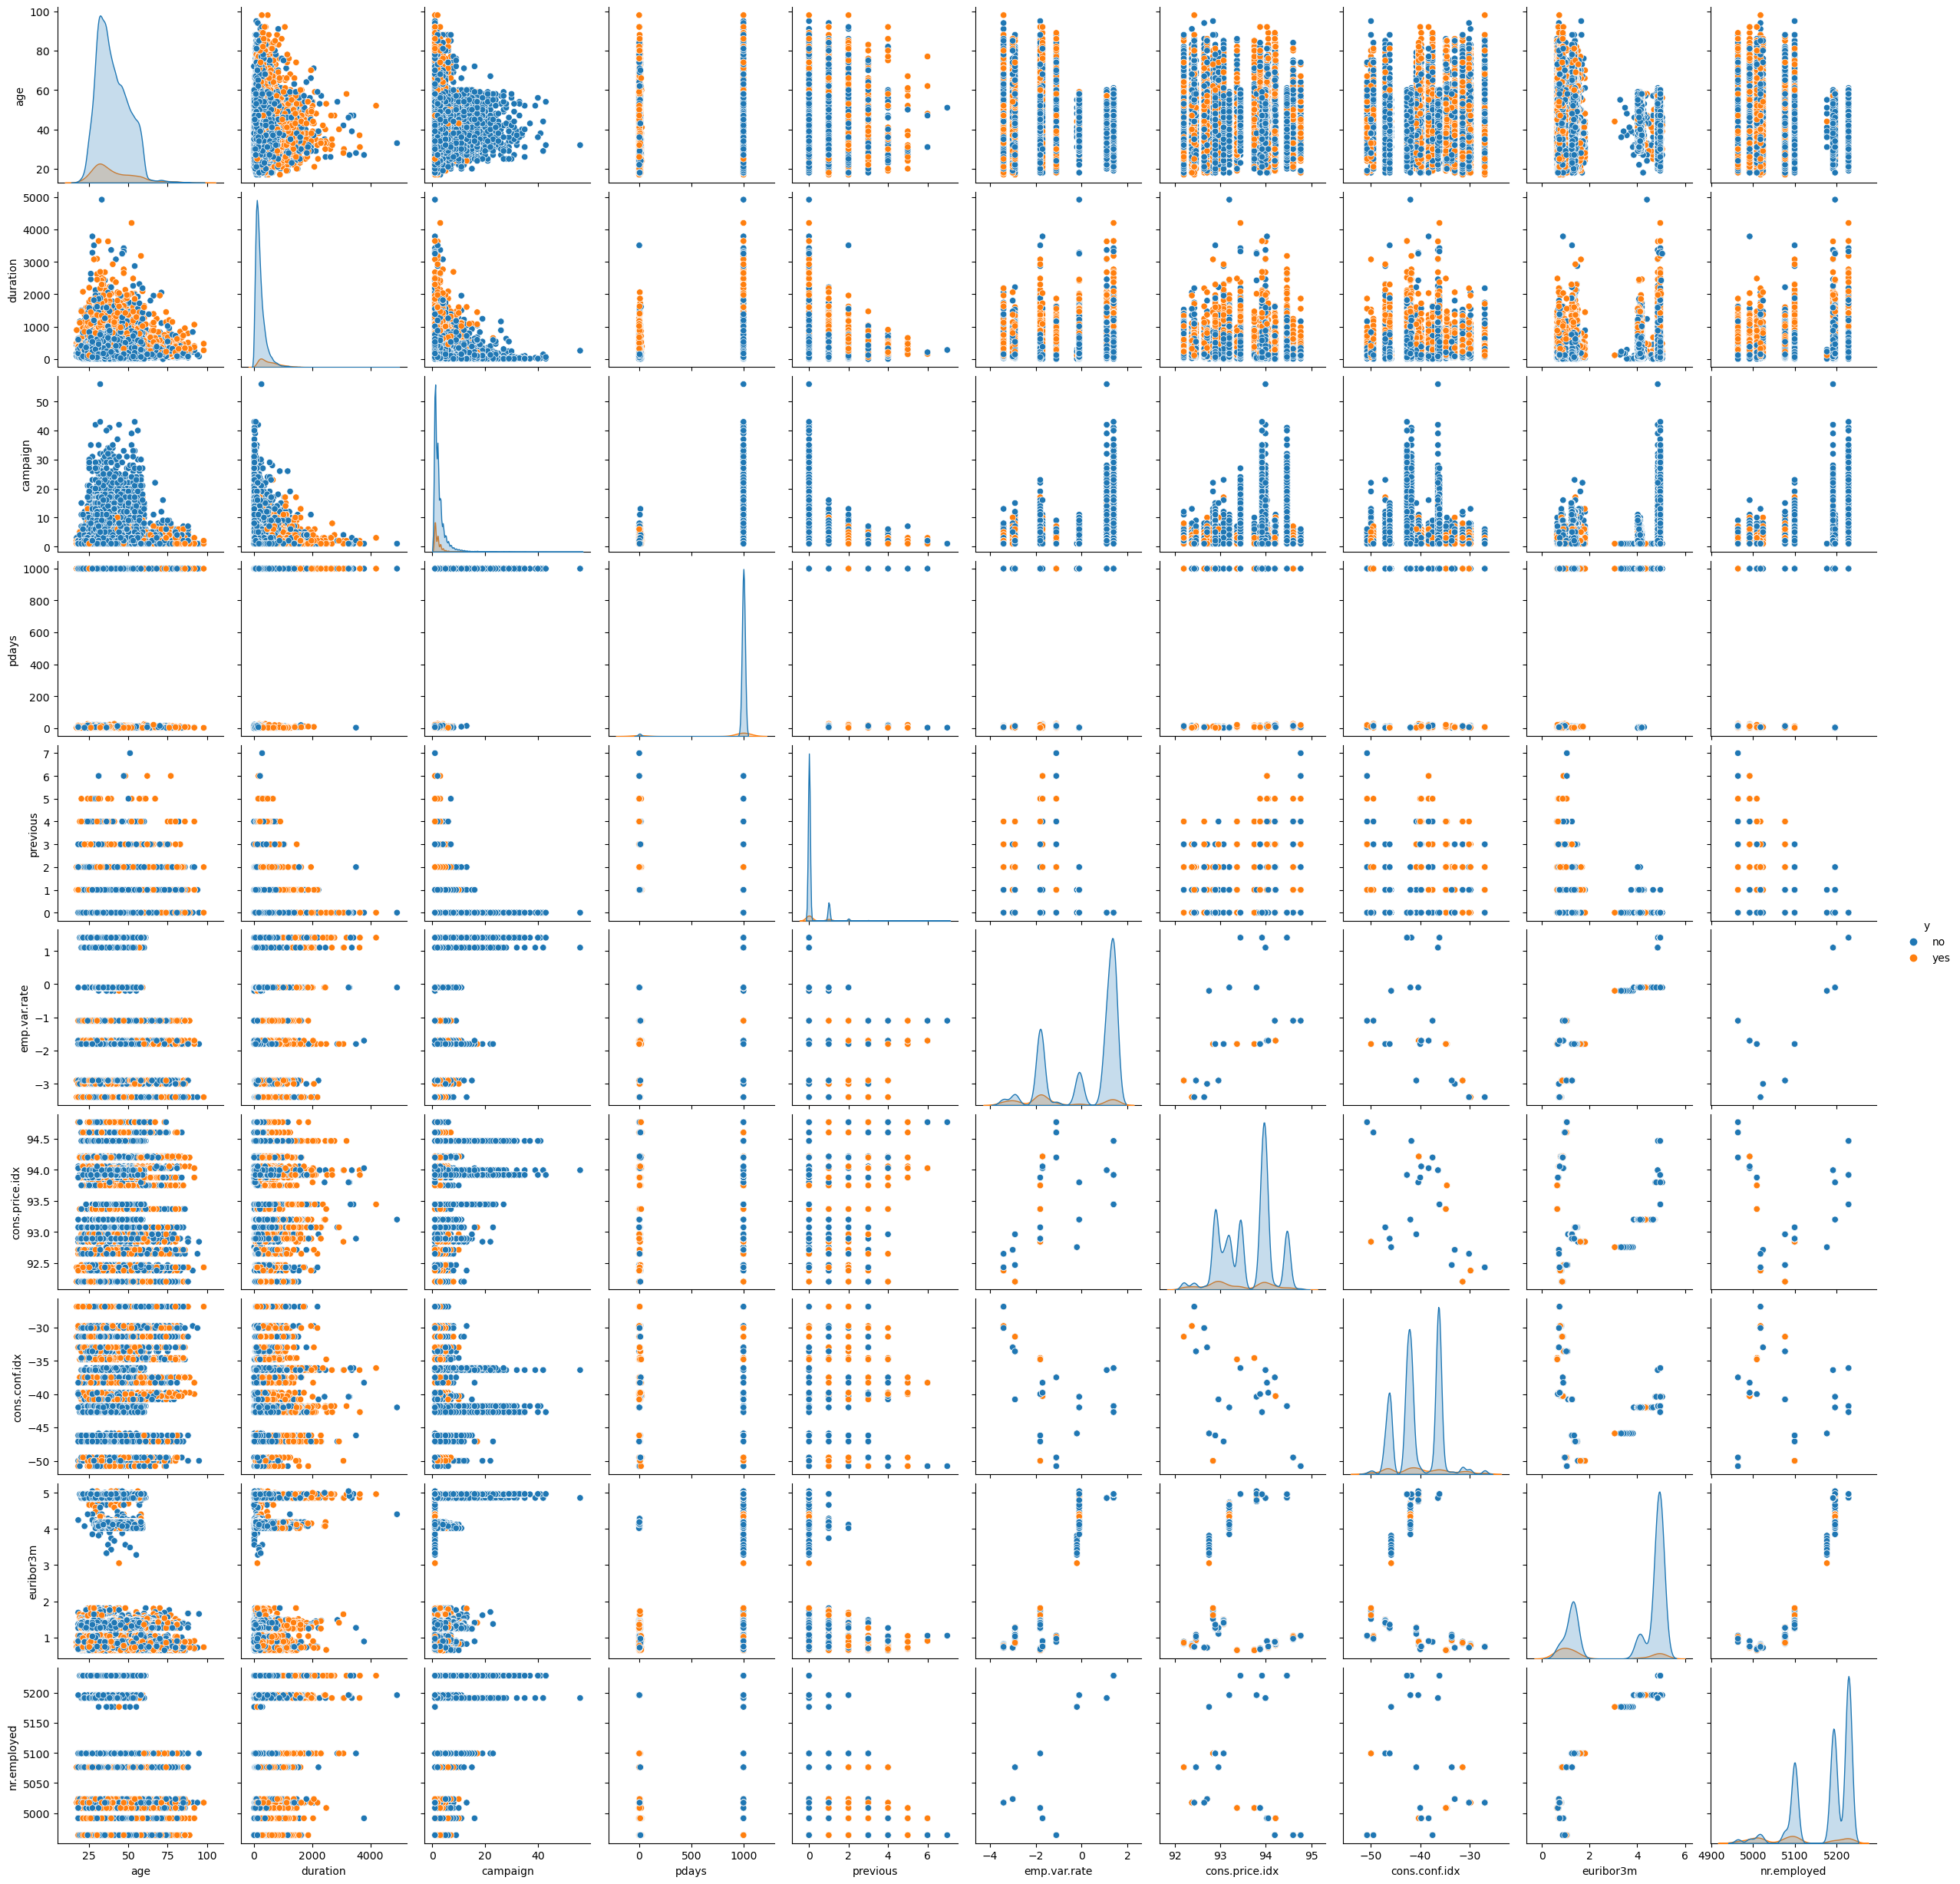

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a pairplot for numeric features with 'y' as hue
numeric_features = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
sns.pairplot(pdf, hue='y', vars=numeric_features, diag_kind='kde')
plt.show()

From the Seaborn chart and class distribution, we can see that there is data imbalance in this dataset. 

However, in our case the imbalanced dataset may reflect the real-world distribution of the classes. Therefore, rebalancing might lead the model to predict more false positives, which may not be desirable. We will keep the data distribution the same to refelct real world distribution and decision making. 

### Train Test Split

In [22]:
X = pdf.drop(columns=['y'])
y = pdf[['y']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Standardizing the training and test data to make sure that different features are on a similar scale and ensure consistent and reliable model performance.

In [23]:
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train) 
X_test = scaler.transform(X_test)

In [24]:
# Converting NumPy arrays to DataFrames
X_train = pd.DataFrame(X_train)
y_train = pd.DataFrame(y_train)
X_test = pd.DataFrame(X_test)
y_test = pd.DataFrame(y_test)

# Saving DataFrames to CSV files
X_train.to_csv('X_train.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

#### Now we have the data preprocessed and ready to fit.